In [1]:
%cd /Users/gwg/dmcm
%matplotlib inline

/Users/gwg/dmcm


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from   models import LeNet5AE
from   data import MnistConfig

In [3]:
cfg = MnistConfig()

directory = '/Users/gwg/dmcm/experiments/test/'
state = torch.load(directory + '/model.pt', map_location={'cuda:0': 'cpu'})
model = LeNet5AE(cfg)
model.load_state_dict(state)
print(model)

LeNet5AE(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=84, bias=True)
  (fc5): Linear(in_features=84, out_features=784, bias=True)
)


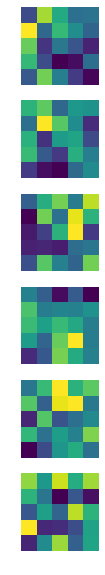

In [15]:
layer   = model.conv1
weights = layer.weight.data

fig, axes = plt.subplots(6, 1, figsize=(10, 10))

for ax, weight in zip(axes.flat, weights):
    im = weight.numpy().T
    im = (im - im.min()) / (im.max() - im.min())
    im = im.squeeze(-1)
    ax.imshow(im, interpolation='nearest', vmin=0, vmax=1)
    ax.axis('off')